# Application 1

In [1]:
import requests # Envoyer des requêtes, Ouvrir un apge Web
from bs4 import BeautifulSoup # Parser du HTML
# Récupérer la page HTML
msn = requests.get("https://www.msn.com/en-us/money/markets/currencies")
print( "code d'état :", msn.status_code)

code d'état : 200


In [2]:
soup = BeautifulSoup(msn.text)

In [29]:
# msn.content.decode("utf-8")

In [3]:
len(msn.text)

113306

In [4]:
msn.text[:1000]

'<?xml version="1.0" encoding="UTF-8" ?>\r\n<!DOCTYPE HTML PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.2//EN" "http://www.openmobilealliance.org/tech/DTD/xhtml-mobile12.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US" dir="ltr">\n\n<head>\n <!-- data-info:v:20200103_20520765;a:ff824755-de11-42cf-824e-3dfe9cb4be45;cn:82;az:{did:8df28e8681774be6b41666cd5d52d6db, rid: 82, sn: neurope-prod-entertainment, dt: 2020-01-13T06:08:24.3741403Z, bt: 2020-01-04T01:15:23.2477716Z};ddpi:1;dpio:;dpi:1;dg:downlevel.pc;th:green;PageName:currenciesPage;m:en-us;cb:;l:en-us;mu:en-us;ud:{cid:,vk:finance,n:,l:en-us,ck:Markets%2CCurrencies};xd:;ovc:f;al:;f:msnallexpusers,muidflt12cf,muidflt259cf,muidflt299cf,muidflt312cf,mmxandroid1cf,audexedge2cf,moneyedge2cf,samrtb-n,audexhp2cf,moneyhp1cf,moneyhp2cf,bingcollabhp3cf,audexhz3cf,artgly5cf,article4cf,gallery5cf,jslltelemetry;userOptOut:false;userOptOutOptions: -->\n <meta name="robots" content="index, follow"/>\n \n \n\n <title>Currency Converte

### Q1 : Quelle est la plus petite classe qui englobe notre table d’intérêt ? Appelons cette classe currency_class. Modifiez le code ci-dessous pour ne sélectionner que la classe currency_class

In [5]:
currency_class = "mjrcurrncsitem"

In [30]:
# cur = soup.find( class_ =  currency_class) 
cur = soup.find( attrs = {"class": currency_class}) 
# Retenez cette syntaxe, elle permet d'extraire une classe quelconque
if cur and len(cur) :
  print("Bravo: il semblerait que j'ai trouvé la classe!")
else:
  print("Je n'ai toujours pas trouvé la classe mère")

Bravo: il semblerait que j'ai trouvé la classe!


### Q2 : Quelle est la classe qui représente l’en-tête de la table ? Notons-la thead_class. Alors l’en-tête s’extrait de la façon suivante 

In [7]:
thead_class = 'mjrcurrncsrow tblheaderrow'

In [8]:
#.mjrcurrncsrow.tblheaderrow   [class=* "pricecol"]

In [31]:
header = cur.find(class_ = thead_class)
headers = header.find_all(class_ = "mctblheading") # Avez-vous pu retrouver la classe `mctblheading`  de vous mêmes ?
header_values = []
for header_element in headers :
    header_values.append(header_element.find("p").attrs["title"])
print(header_values)

['Major Currencies', 'Price', 'Change', 'Change%', '52 Week High', '52 Week Low']


### Q3 : Quelle est la classe qui englobe toutes les lignes de la table ? Elle sera notée trows_class. Pouvez-vous identifier la classe qui caractérise une ligne dans la table ? Notons cette classe `trow_class`

In [10]:
trows_class = "mjcurrncs-data"

In [41]:
rows_container = cur.find(class_ = trows_class)
rows = rows_container.find_all(class_ = "mcrow")
row = rows[2]
print(row)

<div class="mcrow">
<span aria-hidden="True" class="flagcol"><span class="cntryflag" id="GBR"> </span></span>
<div class="cntrycnvrsn">
<span class="cntrycol"><p class="truncated-string" title="British Pound">British Pound</p></span>
<span class="cnvrsncol"><p class="truncated-string" title="GBP/USD">GBP/USD</p></span>
</div>
<span class="pricecol"><p aria-label="Price 1.2979" class="truncated-string" title="1.2979">1.2979</p></span>
<div class="chcpclub">
<span class="chngcol chng-value decrease"><p aria-label="Change -0.0080" class="truncated-string" title="-0.0080">-0.0080</p></span>
<span class="chpcol chp-value decrease"><p aria-label="Change% -0.6126%" class="truncated-string" title="-0.6126%">-0.6126%</p></span>
</div>
<span class="rng52wkcol"><p aria-label="52 Week High 1.3514" class="truncated-string" title="1.3514">1.3514</p></span>
<span class="rng52wkcol"><p aria-label="52 Week Low 1.1957" class="truncated-string" title="1.1957">1.1957</p></span>
</div>


In [38]:
# Cette fonction extraie les différentes colonnes d'une ligen quelconque

def get_row(row):
    flag = row.find(class_ = "cntryflag").attrs["id"]
    
    cur_names = row.find(class_ = "cntrycnvrsn")#.attrs["id"]
    cur_name1 =  cur_names.find( class_ = "cntrycol").p.attrs["title"]
    cur_name2 =  cur_names.find( class_ = "cnvrsncol").find("p").attrs["title"]
    
    price = row.find(class_ = "pricecol").p.attrs["title"]
    
    changes = row.find(class_ = "chcpclub")
    chg_absolute = changes.find(class_  = "chngcol").p.attrs["title"]
    chg_perc  = changes.find(class_  = "chpcol").p.attrs["title"]
    
    return {"flag": flag, "cur_name1": cur_name1, "cur_name2":cur_name2,  "price": price, 
            "chg_absolute": chg_absolute,  "chg_perc": chg_perc}

In [43]:
get_row(row)

{'flag': 'GBR',
 'cur_name1': 'British Pound',
 'cur_name2': 'GBP/USD',
 'price': '1.2979',
 'chg_absolute': '-0.0080',
 'chg_perc': '-0.6126%'}

In [39]:
data = [get_row(row) for row in rows]
data[:2]

[{'flag': 'EUR',
  'cur_name1': 'Euro',
  'cur_name2': 'USD/EUR',
  'price': '0.8979',
  'chg_absolute': '-0.0015',
  'chg_perc': '-0.1668%'},
 {'flag': 'JPN',
  'cur_name1': 'Japanese Yen',
  'cur_name2': 'USD/JPY',
  'price': '109.8900',
  'chg_absolute': '+0.4300',
  'chg_perc': '+0.3928%'}]

### Convertir la donnée en DataFrame Pandas

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(data)
df.head()

,flag,cur_name1,cur_name2,price,chg_absolute,chg_perc
0,EUR,Euro,USD/EUR,0.8979,-0.0015,-0.1668%
1,JPN,Japanese Yen,USD/JPY,109.8900,+0.4300,+0.3928%
2,GBR,British Pound,GBP/USD,1.2979,-0.0080,-0.6126%
3,CAN,Canadian Dollar,USD/CAD,1.3050,0.0000,0.0000%
4,AUS,Australian Dollar,USD/AUD,1.4474,-0.0012,-0.0828%


In [16]:
df.to_csv("msn_currencies.csv") # Sauvegarder au format csv
# df.to_excel("msn_currencies.excel") # Sauvegarder au format excel

In [44]:
# df.to_

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
flag            15 non-null object
cur_name1       15 non-null object
cur_name2       15 non-null object
price           15 non-null float64
chg_absolute    15 non-null object
chg_perc        15 non-null object
dtypes: float64(1), object(5)
memory usage: 848.0+ bytes


### On peut aussi faire quelques analyses statistiques 

In [18]:
df["price"] = df["price"].str.replace(",", "").astype(float) # Conversion en numérique

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
flag            15 non-null object
cur_name1       15 non-null object
cur_name2       15 non-null object
price           15 non-null float64
chg_absolute    15 non-null object
chg_perc        15 non-null object
dtypes: float64(1), object(5)
memory usage: 848.0+ bytes


In [20]:
df.price.max()

1156.61

### Et un peu de la visualisation

In [21]:
import seaborn as sns

In [22]:
df.head()

,flag,cur_name1,cur_name2,price,chg_absolute,chg_perc
0,EUR,Euro,USD/EUR,0.8979,-0.0015,-0.1668%
1,JPN,Japanese Yen,USD/JPY,109.8900,+0.4300,+0.3928%
2,GBR,British Pound,GBP/USD,1.2979,-0.0080,-0.6126%
3,CAN,Canadian Dollar,USD/CAD,1.3050,0.0000,0.0000%
4,AUS,Australian Dollar,USD/AUD,1.4474,-0.0012,-0.0828%


In [23]:
df2 = df.sort_values("price")

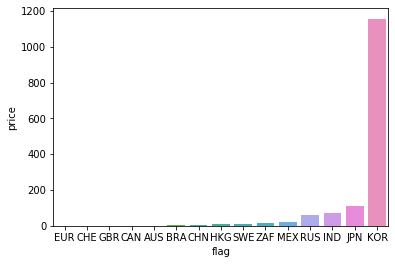

In [24]:
sns.barplot(df2.flag, df2.price, orient = "v")

# Partie sélecteurs CSS